In [1]:
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.4 anndata==0.11.1 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.0 igraph==0.11.5 pynndescent==0.5.12


In [2]:
nr = sc.read_h5ad('./NR/V2L_NR_L23_filter.h5ad')
dr = sc.read_h5ad('./DR/V2L_DR_L23_filter.h5ad')

In [34]:
adata = sc.AnnData.concatenate(nr,dr,batch_categories=('NR','DR'),batch_key='cond')
adata.write_h5ad('./NR_DR_V2L_L23_filter_merge.h5ad')

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_62803/3207450404.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = sc.AnnData.concatenate(nr,dr,batch_categories=('NR','DR'),batch_key='cond')


In [35]:
adata.obs

,n_genes,n_counts,doublet_score,Sample,Class,Subclass,Subtype,Ann_subclass_cell,Type,cond
AAACGAAAGAAGCGCT-1-V2L_1-NR,579,762.0,0.021762,V2L_1,Glut,L2/3 IT CTX,Type A,007 L2/3 IT CTX Glut,L2/3 IT CTX A,NR
AAACGAACAGGTACGA-1-V2L_1-NR,1459,2697.0,0.040264,V2L_1,Glut,L2/3 IT CTX,Type C,007 L2/3 IT CTX Glut,L2/3 IT CTX C,NR
AAACGAAGTAATTAGG-1-V2L_1-NR,1593,2891.0,0.053322,V2L_1,Glut,L2/3 IT CTX,Type B,007 L2/3 IT CTX Glut,L2/3 IT CTX B,NR
AAACGAATCTCGGCTT-1-V2L_1-NR,1286,2179.0,0.022246,V2L_1,Glut,L2/3 IT CTX,Type A,007 L2/3 IT CTX Glut,L2/3 IT CTX A,NR
AAACGCTCACCTTCCA-1-V2L_1-NR,1144,1933.0,0.072668,V2L_1,Glut,L2/3 IT CTX,Type B,007 L2/3 IT CTX Glut,L2/3 IT CTX B,NR
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGGTGATCG-1-V2L_2-DR,1854,3630.0,0.028843,V2L_2,Glut,L2/3 IT CTX,Type A,007 L2/3 IT CTX Glut,L2/3 IT CTX A,DR
TTTGGTTGTTCACGAT-1-V2L_2-DR,2420,5707.0,0.098200,V2L_2,Glut,L2/3 IT CTX,Type B,007 L2/3 IT CTX Glut,L2/3 IT CTX B,DR
TTTGTTGCACTCTGCT-1-V2L_2-DR,2026,4249.0,0.039651,V2L_2,Glut,L2/3 IT CTX,Type C,007 L2/3 IT CTX Glut,L2/3 IT CTX C,DR
TTTGTTGCAGCTTTGA-1-V2L_2-DR,2385,5681.0,0.024654,V2L_2,Glut,L2/3 IT CTX,Type B,007 L2/3 IT CTX Glut,L2/3 IT CTX B,DR


In [36]:
Subtype = []
for i in range(adata.shape[0]):
    if adata.obs['cond'][i] == 'NR':
        if adata.obs['Sample'][i] == 'V2L_1':
            Subtype.append('N1 '+adata.obs['Type'][i])
        else:
            Subtype.append('N2 '+adata.obs['Type'][i])
    elif adata.obs['cond'][i] == 'DR':
        if adata.obs['Sample'][i] == 'V2L_1':
            Subtype.append('D1 '+adata.obs['Type'][i])
        else:
            Subtype.append('D2 '+adata.obs['Type'][i])

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_62803/2435366537.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adata.obs['cond'][i] == 'NR':
/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_62803/2435366537.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adata.obs['Sample'][i] == 'V2L_1':
/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_62803/2435366537.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

In [37]:
adata.write_h5ad('./NR_DR_V2L_L23_filter_merge.h5ad')

ranking genes
    finished: added to `.uns['t-test_bh']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


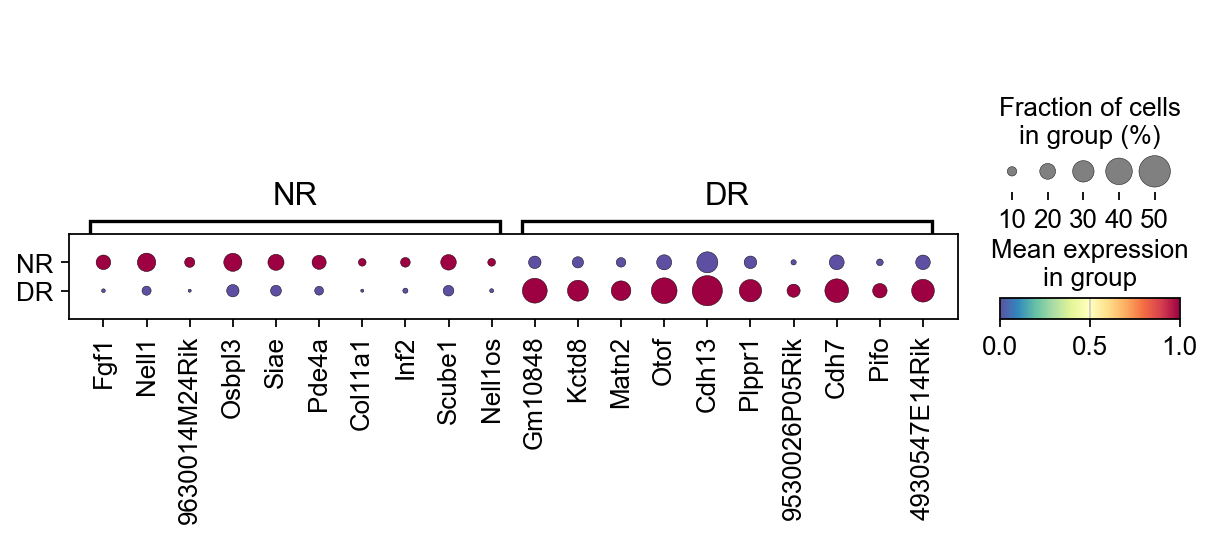

In [9]:
sc.tl.rank_genes_groups(adata, groupby='cond',groups='all', reference='rest', method='t-test',pts=True,corr_method='benjamini-hochberg',key_added='t-test_bh')
sc.pl.rank_genes_groups_dotplot(adata, n_genes=10,groupby='cond',cmap='Spectral_r', standard_scale='var',key='t-test_bh',min_logfoldchange=1)

In [15]:
df_subclass=sc.get.rank_genes_groups_df(adata, group='DR',key='t-test_bh')

In [10]:
import seaborn as sns
sns.set_theme(style="ticks")

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_71331/4049156386.py:12: RuntimeWarning:

divide by zero encountered in log10

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10



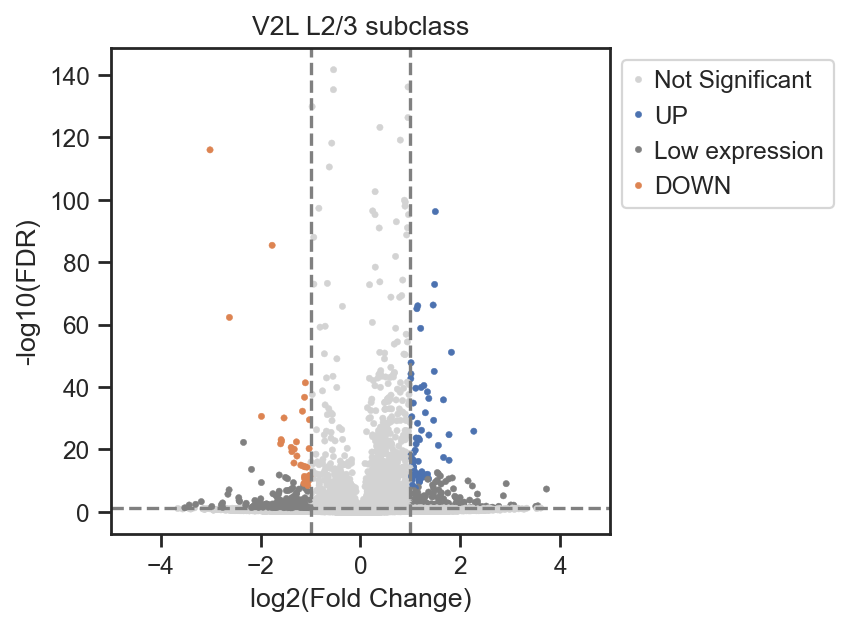

In [16]:
df = pd.DataFrame()
gene = list(df_subclass['names'])
log2FoldChange = list(df_subclass['logfoldchanges'])
pvalue = list(df_subclass['pvals'])
FDR = list(df_subclass['pvals_adj'])
pts_u = list(df_subclass['pct_nz_group'])
pts_d = list(df_subclass['pct_nz_reference'])
df['gene'] = gene
df['log2FoldChange'] = log2FoldChange
df['pvalue'] = pvalue
df['FDR'] = FDR
df['-log10(FDR)'] = df['FDR'].apply(lambda x: -np.log10(x))
df['pts_u'] = pts_u
df['pts_d'] = pts_d


padj_threshold = 0.05
log2fc_threshold = 1.0


df['significance'] = 'Not Significant'
df.loc[(df['FDR'] < padj_threshold) & (df['log2FoldChange'] >= log2fc_threshold) & (df['pts_u'] > 0.05), 'significance']  = 'UP'
df.loc[(df['FDR'] < padj_threshold) & (df['log2FoldChange'] <= -log2fc_threshold) & (df['pts_d'] > 0.05), 'significance'] = 'DOWN'
#df.loc[df['gene'].isin(marker), 'significance'] = 'Marker gene'
df.loc[(df['FDR'] < padj_threshold) & (df['log2FoldChange'] >= log2fc_threshold) & (df['pts_u'] < 0.05), 'significance']  = 'Low expression'
df.loc[(df['FDR'] < padj_threshold) & (df['log2FoldChange'] <= -log2fc_threshold) & (df['pts_d'] < 0.05), 'significance']  = 'Low expression'

plt.figure(figsize=(4, 4))
sns.scatterplot(data=df, x='log2FoldChange', y=-np.log10(df['FDR']), hue='significance', s= 8, palette={'UP':'C0','DOWN': 'C1', 'Not Significant': 'lightgray','Low expression':'gray'}, edgecolor=None)


plt.axhline(y=-np.log10(padj_threshold), color='grey', linestyle='--')
plt.axvline(x=log2fc_threshold, color='grey', linestyle='--')
plt.axvline(x=-log2fc_threshold, color='grey', linestyle='--')

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(FDR)')
plt.title('V2L L2/3 subclass')
plt.legend(title='Significance')
plt.xlim((-5,5))
#plt.ylim((-2,50))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('V2L_L23_subclass_filter.pdf')

In [17]:
df.to_csv('V2L_L23_subclass_DEG_filter.xls',index=True,sep='\t')

In [18]:
df

,gene,log2FoldChange,pvalue,FDR,-log10(FDR),pts_u,pts_d,significance
0,Egfem1,0.953603,9.809907e-141,6.904213e-137,136.160886,0.925744,0.786772,Not Significant
1,Epha6,0.951722,1.255475e-130,4.418015e-127,126.354773,0.917384,0.782146,Not Significant
2,Fgf14,0.389464,2.070222e-127,6.244382e-124,123.204511,0.998279,0.995143,Not Significant
3,Cntnap5a,0.798169,2.721281e-123,7.182140e-120,119.143746,0.938038,0.825624,Not Significant
4,Lrrtm4,0.293177,1.383927e-106,2.435019e-103,102.613498,0.999508,0.999075,Not Significant
...,...,...,...,...,...,...,...,...
21109,Asic2,-0.575658,2.876175e-122,6.747506e-119,118.170857,0.969757,0.985430,Not Significant
21110,Pde10a,-0.968604,3.285815e-134,1.387534e-130,129.857756,0.790017,0.885523,Not Significant
21111,Nrxn3,-0.541983,9.550599e-140,5.041284e-136,135.297459,0.994099,0.996531,Not Significant
21112,Gm42418,-0.539157,1.929556e-146,2.037033e-142,141.691002,0.980084,0.989593,Not Significant


In [19]:
df_sig = df[df['significance'].isin (['UP','DOWN'])]

In [20]:
df_sig

,gene,log2FoldChange,pvalue,FDR,-log10(FDR),pts_u,pts_d,significance
8,Gm10848,1.499898,4.958322e-100,5.816112e-97,96.235367,0.365134,0.146392,UP
20,Kctd8,1.485103,2.014090e-76,1.288652e-73,72.889864,0.290386,0.126966,UP
25,Matn2,1.456179,9.337441e-70,5.188177e-67,66.284985,0.267273,0.102220,UP
26,Otof,1.147937,1.686213e-69,9.128899e-67,66.039582,0.383083,0.187558,UP
27,Cdh13,1.129887,1.497380e-68,7.711140e-66,65.112881,0.473568,0.292784,UP
...,...,...,...,...,...,...,...,...
21089,Siae,-1.120466,8.807390e-40,1.878376e-37,36.726217,0.121711,0.205134,DOWN
21093,Osbpl3,-1.104104,1.637630e-44,4.216698e-42,41.375027,0.144332,0.240056,DOWN
21100,9630014M24Rik,-2.624932,9.518328e-66,4.784999e-63,62.320118,0.022621,0.111471,DOWN
21104,Nell1,-1.769522,4.640434e-89,3.768390e-86,85.423844,0.096386,0.245606,DOWN


In [21]:
df_sig['significance'].value_counts()

significance
UP      66
DOWN    31
Name: count, dtype: int64